# t-SNE MNIST

In [1]:
# import packages
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
np.random.seed(2)

In [2]:
# load data
with open('datasets/mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

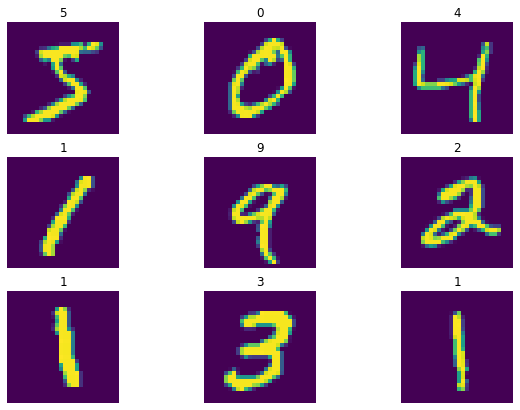

In [3]:
# plot some images from mnist
plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(mnist['images'][i])
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

<b> Note: </b> The scikit-learn PCA API requires that the data that's passed to the fit method is in the form required (number of samples, number of features, and so on). As such, we need to reshape the MNIST images as they are in the form (number of samples, feature 1, feature 2). 

In [4]:
# create the model
model_pca = PCA(n_components=30)

In [5]:
# fit the model
mnist_pca = model_pca.fit(mnist['images'].reshape((-1, 28 * 28)))

Visualize the effect of reducing the dataset to 30 components. To do this, we must transform the dataset into the lower-dimensional space and then use the inverse_transform method to return the data to its original size for plotting. We will, of course, need to reshape the data before and after the transform process.

In [6]:
# transform data
mnist_30comp = model_pca.transform(mnist['images'].reshape((-1, 28 * 28)))
mnist_30comp_vis = model_pca.inverse_transform(mnist_30comp)
mnist_30comp_vis = mnist_30comp_vis.reshape((-1, 28, 28))

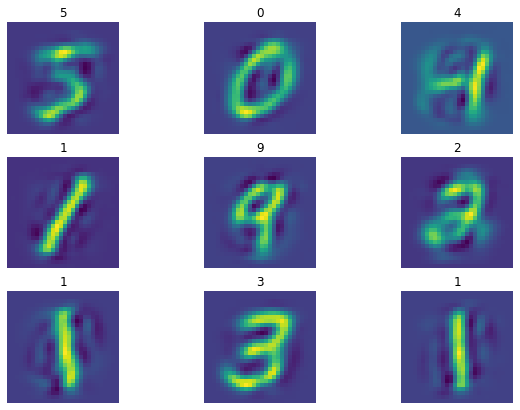

In [7]:
# plot data
plt.figure(figsize=(10, 7))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(mnist_30comp_vis[i])
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

We will apply t-SNE to the PCA-transformed data to visualize the 30 components in a two-dimensional space. We can construct a t-SNE model in scikit-learn using the standard model API interface. We will start off by using the default values that specify that we are embedding the 30 dimensions into two for visualization using a perplexity of 30, a learning rate of 200, and 1,000 iterations. We will specify a random_state value of 0 and set verbose to 1

In [8]:
# create tSNE
model_tsne = TSNE(learning_rate=200,
                  n_components=2,
                  n_iter=1000,
                  perplexity=30,
                  random_state=0,
                  verbose=1)
model_tsne

TSNE(learning_rate=200, perplexity=30, random_state=0, verbose=1)

In [9]:
# Use t-SNE to transform the decomposed dataset of MNIST
mnist_tsne = model_tsne.fit_transform(mnist_30comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 3.901s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 279.559349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.301758
[t-SNE] KL divergence after 1000 iterations: 1.699996


In [10]:
# visualize the number of dimensions in the returned dataset
mnist_tsne.shape

(10000, 2)

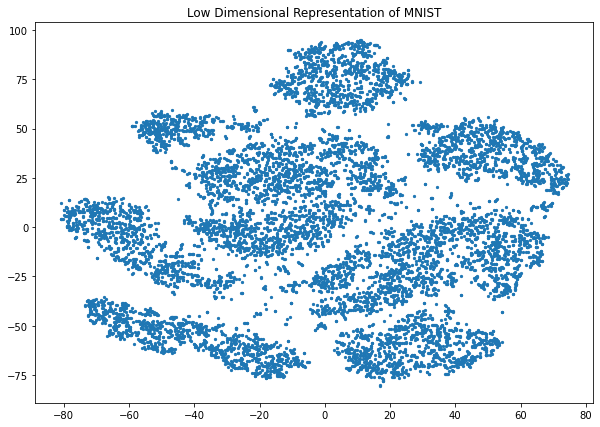

In [11]:
# Create a scatter plot of the two-dimensional data produced by the model
plt.figure(figsize=(10, 7))
plt.scatter(mnist_tsne[:, 0], mnist_tsne[:, 1], s=5)
plt.title('Low Dimensional Representation of MNIST')
plt.show()

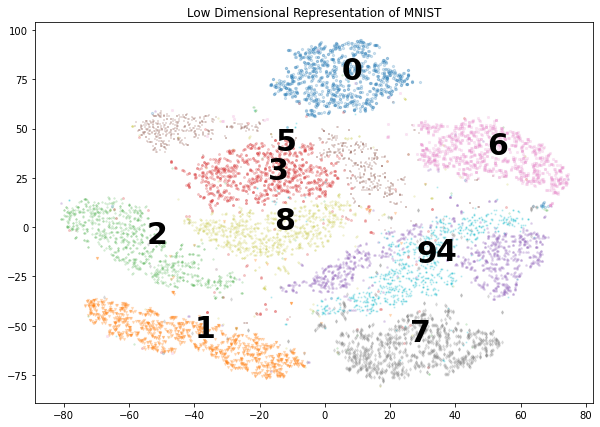

In [12]:
# Plot the two-dimensional data using markers to separate the individual labels
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of MNIST');
for i in range(10):
    selections = mnist_tsne[mnist['labels'] == i]
    plt.scatter(selections[:,0], selections[:,1], alpha=0.2, marker=MARKER[i], s=5);
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()

<b> Note: </b> The marker parameter corresponds to the shapes that can be seen for individual points on the plot. They don't show up in detail on the plots in this chapter since there are many samples and hence the resolution is lost with the crops.

Around the edges of each cluster, we can see that some samples would be misclassified in the traditional supervised learning sense but represent samples that may have more in common with other clusters than their own. Let's take a look at an example; there are a number of samples of the number three that are quite far from the correct cluster.

In [13]:
# Get the index of all the number threes in the dataset
threes = np.where(mnist['labels'] == 3)[0]
threes

array([   7,   10,   12, ..., 9974, 9977, 9991], dtype=int64)

In [14]:
# find the threes that were plotted with an x value of less than 0
tsne_threes = mnist_tsne[threes]
far_threes = np.where(tsne_threes[:, 0] < -30)[0]
far_threes

array([   0,   11,   14,   17,   18,   19,   21,   22,   25,   29,   30,
         31,   32,   34,   35,   37,   39,   41,   42,   43,   51,   54,
         55,   56,   58,   60,   63,   66,   67,   68,   74,   76,   78,
         79,   80,   94,   96,   98,   99,  101,  102,  105,  107,  110,
        114,  116,  120,  122,  123,  126,  128,  133,  137,  142,  143,
        144,  145,  151,  152,  158,  169,  170,  171,  183,  184,  188,
        207,  227,  229,  230,  232,  235,  237,  238,  239,  240,  243,
        244,  245,  247,  263,  292,  294,  295,  303,  307,  308,  313,
        315,  319,  327,  335,  337,  346,  368,  370,  373,  379,  385,
        387,  388,  389,  398,  406,  410,  421,  422,  424,  427,  431,
        432,  433,  437,  438,  439,  457,  467,  493,  495,  497,  498,
        503,  505,  506,  507,  512,  517,  523,  554,  555,  557,  560,
        561,  563,  564,  567,  569,  571,  574,  579,  581,  583,  585,
        588,  593,  594,  595,  596,  598,  600,  6

In [15]:
# Display the coordinates to find one that is reasonably far from the three cluster
tsne_threes[far_threes]

array([[-32.119    ,  16.190784 ],
       [-33.198112 ,  26.013874 ],
       [-33.488453 ,  27.551619 ],
       [-34.523907 ,  26.634068 ],
       [-30.826197 ,  14.385183 ],
       [-37.32901  ,  15.137681 ],
       [-37.04024  ,  15.271422 ],
       [-38.383896 ,  15.578539 ],
       [-31.579344 ,  27.94891  ],
       [-33.46005  ,  27.690805 ],
       [-31.851072 ,  15.978311 ],
       [-30.991354 ,  25.93165  ],
       [-33.042046 ,  29.421732 ],
       [-32.64938  ,  28.396109 ],
       [-33.54818  ,  29.14886  ],
       [-32.123116 ,  25.005003 ],
       [-32.549744 ,  15.768647 ],
       [-32.142582 ,  25.031294 ],
       [-39.922386 ,  25.141697 ],
       [-31.830849 ,  30.082232 ],
       [-35.172363 ,  10.41482  ],
       [-37.22617  ,  27.700098 ],
       [-37.226494 ,  27.866198 ],
       [-37.630962 ,  28.172274 ],
       [-35.619373 ,  28.247128 ],
       [-35.18637  ,  17.423119 ],
       [-35.219604 ,  11.1331215],
       [-32.825333 ,  28.784986 ],
       [-33.729485 ,

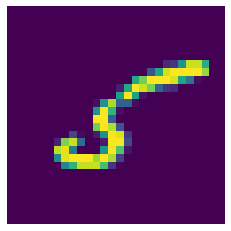

In [16]:
# Choose a sample with a reasonably high negative value as an x coordinate
plt.imshow(mnist['images'][11])
plt.axis('off');
plt.show()

Looking at this sample image and the corresponding t-SNE coordinates, that is, approximately (-33, 26), it is not surprising that this sample lies near the cluster of eights and fives as there are quite a few features that are common to both of those numbers in this image. In this example, we applied a simplified SNE, demonstrating some of its efficiencies as well as possible sources of confusion and the output of unsupervised learning.

# t-SNE MNIST and Perplexity

In this exercise, we are investigating the effect of perplexity on the t-SNE manifold.

In [17]:
# create the model
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit_transform(mnist['images'].reshape((-1, 28 ** 2)))

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 3.723s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 170.365491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.777405
[t-SNE] KL divergence after 1000 iterations: 1.850833


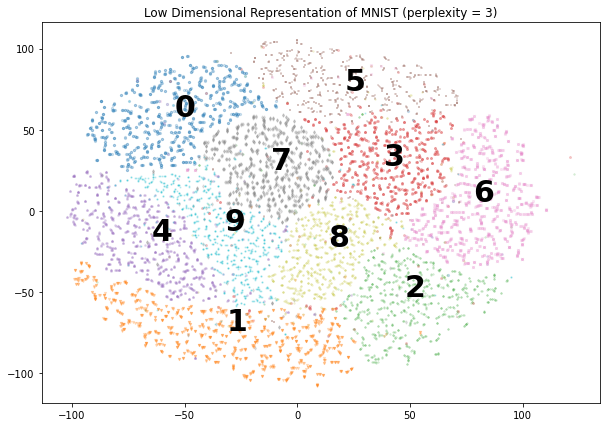

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 3.819s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 279.703777
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.282867
[t-SNE] KL divergence after 1000 iterations: 1.698641


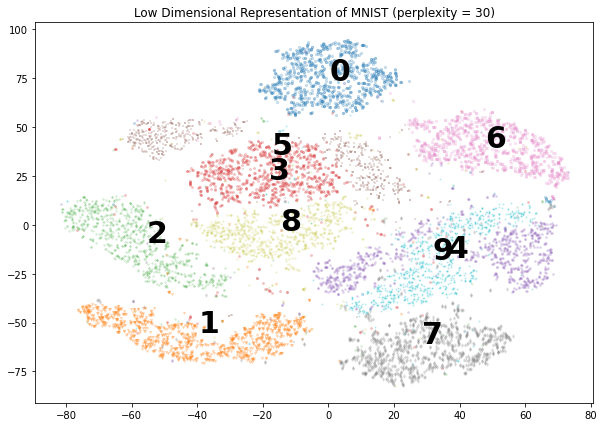

[t-SNE] Computing 901 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 5.612s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 383.483825
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.790451
[t-SNE] KL divergence after 1000 iterations: 1.192548


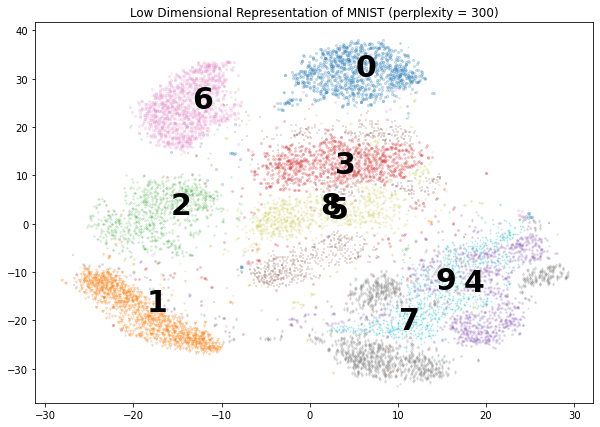

In [18]:
# Iterate through a model/plot loop with a perplexity of 3, 30, and 300
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for perp in [3, 30, 300]:
    model_tsne = TSNE(random_state=0, verbose=1, perplexity=perp)
    mnist_tsne = model_tsne.fit_transform(mnist_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of MNIST (perplexity = {perp})')
    for i in range(10):
        selections = mnist_tsne[mnist['labels'] == i]
        plt.scatter(selections[:, 0], selections[:, 1], alpha=0.2, marker=MARKER[i], s=5)
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
    plt.show()

Note the KL divergence in each of the three different perplexity values, along with the increase in the average standard deviation (variance). By looking at the following t-SNE plots with class labels, we can see that with a low perplexity value, the clusters are nicely contained with relatively few overlaps. However, there is almost no space between the clusters. As we increase the perplexity, the space between the clusters improves with reasonably clear distinctions at a perplexity of 30. As the perplexity increases to 300, we can see that the clusters of eight and five, along with nine, four, and seven, are starting to converge.

In this exercise, we developed our understanding of the effect of perplexity and the sensitivity of this value to the overall result. A small perplexity value can lead to a more homogenous mix of locations with very little space between them. Increasing the perplexity separates the clusters more effectively, but an excessive value leads to overlapping clusters.

# t-SNE MNIST and Iterations

In [19]:
# load data
with open('datasets/mnist.pkl', 'rb') as f:
    mnist = pickle.load(f)

In [20]:
# using PCA to select only the first 30 components
model_pca = PCA(n_components=30)
mnist_pca = model_pca.fit_transform(mnist['images'].reshape((-1, 28 ** 2)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 4.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 280.828754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.256348
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704

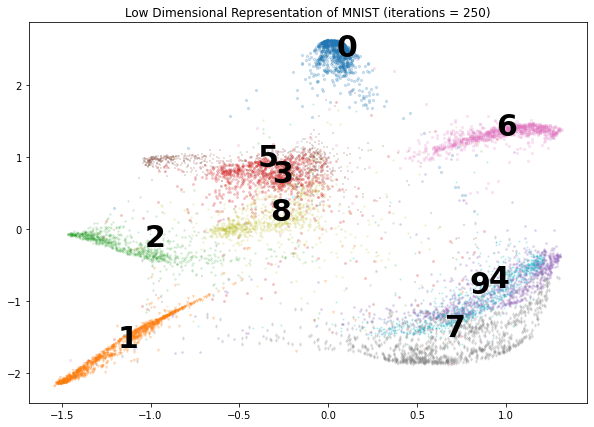

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 3.982s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 280.828754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.256348
[t-SNE] KL divergence after 500 iterations: 1.976303


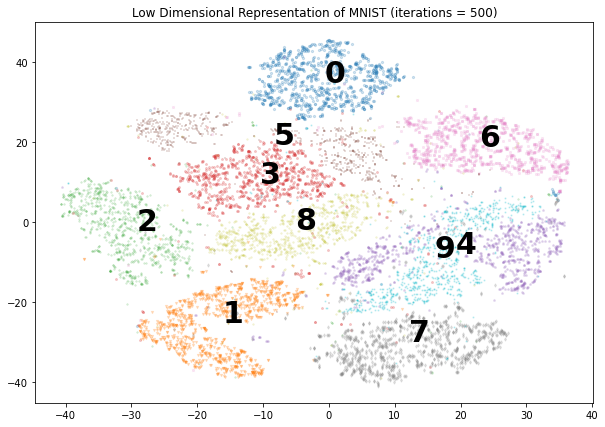

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 4.345s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 280.828754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.256348
[t-SNE] KL divergence after 1000 iterations: 1.693026


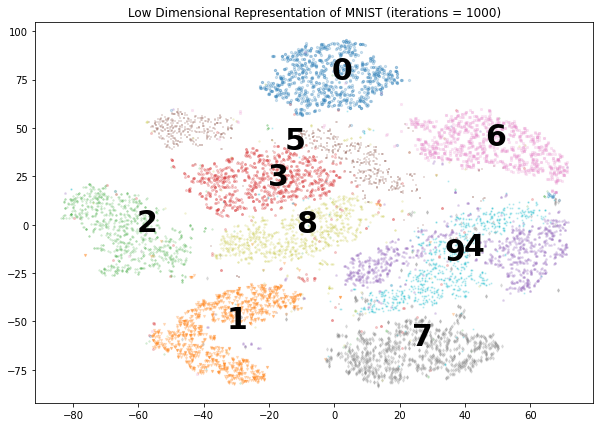

In [21]:
# Iterate through a model/plot loop with iteration values 250, 500, and 1000
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0,
                      verbose=1,
                      n_iter=iterations,
                      n_iter_without_progress=iterations)
    mnist_tsne = model_tsne.fit_transform(mnist_pca)
    # plot the results
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of MNIST (iterations = {iterations})')
    for i in range(10):
        selections = mnist_tsne[mnist['labels'] == i]
        plt.scatter(selections[:, 0], selections[:, 1], alpha=0.2, marker=MARKER[i], s=5)
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size':30})
    plt.show()

A reduced number of iterations limits the extent to which the algorithm can find relevant neighbors, leading to ill-defined clusters. Increasing the number of iterations provides the algorithm with enough time to adequately project the data.

Once the clusters have settled, increased iterations have an extremely small effect and essentially lead to increased training time.